In [ ]:
# Installation
# ! pip install librosa soundfile numpy sklearn pyaudio

In [1]:
import librosa
import librosa.display
import soundfile as sf
import os, glob, pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
#Checking the data 
file_path = "../SER/SER-Ravdess-data"
print(os.listdir(file_path))

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [3]:
sound, saamplerate = librosa.load(f'{file_path}/Actor_01/03-01-01-01-01-01-01.wav')

In [4]:
print('Vibration sequence:', sound)
array_len =sound.shape
print('Sound shape:', array_len)
print('Sample Rate (Hz):',saamplerate)

print('Length of Audio:', array_len[0]/saamplerate)

Vibration sequence: [0. 0. 0. ... 0. 0. 0.]
Sound shape: (72839,)
Sample Rate (Hz): 22050
Length of Audio: 3.3033560090702947


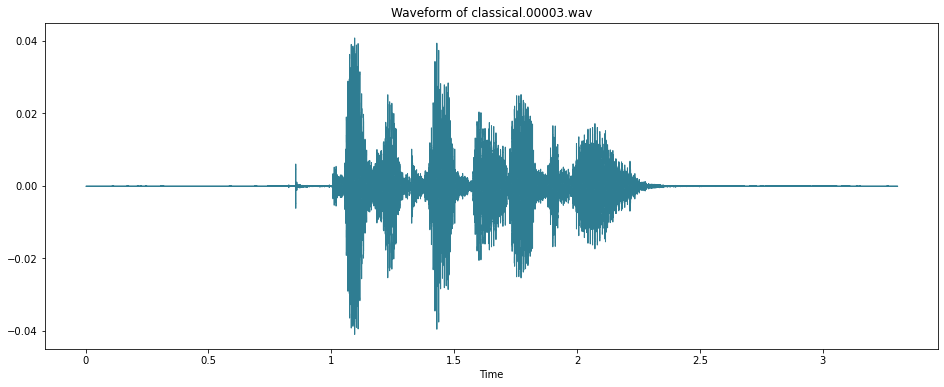

In [5]:
plt.figure(figsize=(16, 6))
librosa.display.waveshow(y=sound, sr=saamplerate, color="#2f7d92ff")
plt.title("Waveform of classical.00003.wav", fontsize=12)  
plt.show()

In [6]:
# Extracting feature; mfcc, chroma, mel

#DataFlair - Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with sf.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
                    mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
                    result=np.hstack((result, mel))
        return result

In [7]:
# Defining emotions in the dataset

emotions = {
    '01':'neutral',
    '02':'calm',
    '03':'happy',
    '04':'sad',
    '05':'angry',
    '06':'fearful',
    '07':'disgust',
    '08':'surprised'
}

observed_emotions =['calm','happy','fearful','disgust']

In [15]:
#Loading the data and extraxting the features for each sound file
def load_data(test_size=0.2):
    x,y = [],[]
    for file in glob.glob("../SER/SER-Ravdess-data/Actor_*/*.wav"):
        file_name = os.path.basename(file)
        emotion = emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature = extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
        # return train_test_split(np.array(x),y,test_size=test_size,random_state=9 )
        return y

In [16]:



load_data()

C:\Users\halle\AppData\Local\Temp\ipykernel_10080\1062277746.py:18: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


['calm']